# SDS Exam Project

- Report question
- Introduction
- Litterature review
    - https://www.nottingham.ac.uk/economics/documents/research-first/krishan-rayarel.pdf
- Data collection and ethics
    - Documentation on AlphaVantage API: https://www.alphavantage.co/documentation/#time-series-data
- Machine learning
    - Sentiment analysis
    - Training, validation and test set
    - Use Vader or other package?
    
- Case study with selected tweets on specific firms
    - Use Dow Jones and data for stocks of specific firm
- Discussion
- Conclusion


In [260]:
import pandas as pd, pprint
import requests
import matplotlib
import datetime
import numpy as np
import scraping_class, time, json
logfile = 'data_collection_log'## name your log file.
connector = scraping_class.Connector(logfile)

# Dow Jones

In [265]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=^DJI&outputsize=full&apikey="
apikey = "Z6OIONR9OK9RAHMX"

response_dji, call_id = connector.get(url+apikey, 'dji_data_collection') #ask for help regarding connector
data = response_dji.json()

def convert_response(d):
    for dt, prec in d['Time Series (Daily)'].items():
        r = {'datetime':dt}
        r.update(prec)
        yield r
    
df = pd.DataFrame(convert_response(data))
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime',inplace=True)
df.sort_index(inplace=True)


#change the name
df = df.rename(columns={ '1. open':'dji_open','2. high':'dji_high','3. low':'Low','4. close':'dji_close','5. adjusted close':'dji_adj_close','6. volume':'dji_volume','7. dividend amount':'Dividend amount','8. split coefficient':'Split coefficient'})

df_dji = df.iloc[:,[0,3,4,5]] #Select only the columns we want


df_dji['dji_pct_change'] = '' #create empty column to contain pct. change
r = df_dji['dji_adj_close'].astype(float).pct_change(1) #calculate the change
df_dji['dji_pct_change'] = r #store the results in the empty column. There should be one row without a value
# but fortunately that row is outside of our selected window

df_dji['dji_bool'] = ''

def pct_bool(df):
    dji_pct_bool = []

    for x in df['dji_pct_change']:
        if x > 0:
            dji_pct_bool.append(1)
        else:
            dji_pct_bool.append(0)

    df["dji_bool"] = dji_pct_bool

pct_bool(df_dji)

df_dji_final['dji_open'] = df_dji_final['dji_open'].astype(float)
df_dji_final['dji_close'] = df_dji_final['dji_close'].astype(float)
df_dji_final['dji_adj_close'] = df_dji_final['dji_adj_close'].astype(float)
df_dji_final['dji_volume'] = df_dji_final['dji_volume'].astype(float)

start_date = '2017-01-20'
end_date = '2019-08-20'
df_dji_final = df_dji[start_date:end_date]


df_dji_final.to_csv('dji.csv')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

# S&P 500

In [275]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPX&outputsize=full&apikey="
apikey: "Z6OIONR9OK9RAHMX"

response_sp, call_id = connector.get(url+apikey, 'call_id') #ask for help regarding connector
data = response_sp.json()

def convert_response(d):
    for dt, prec in d['Time Series (Daily)'].items():
        r = {'datetime':dt}
        r.update(prec)
        yield r
    
df = pd.DataFrame(convert_response(data))
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime',inplace=True)
df.sort_index(inplace=True)


#change the name
df = df.rename(columns={ '1. open':'sp_open','2. high':'sp_high','3. low':'Low','4. close':'sp_close','5. adjusted close':'sp_adj_close','6. volume':'sp_volume','7. dividend amount':'Dividend amount','8. split coefficient':'Split coefficient'})

df_sp = df.iloc[:,[0,3,4,5]] #Select only the columns we want


df_sp['sp_pct_change'] = '' #create empty column to contain pct. change
r = df_sp['sp_adj_close'].astype(float).pct_change(1) #calculate the change
df_sp['sp_pct_change'] = r #store the results in the empty column. There should be one row without a value
# but fortunately that row is outside of our selected window


df_sp['sp_bool'] = ''
def pct_bool(df):
    sp_pct_bool = []

    for x in df['sp_pct_change']:
        if x > 0:
            sp_pct_bool.append(1)
        else:
            sp_pct_bool.append(0)

    df["sp_bool"] = sp_pct_bool

    
pct_bool(df_sp)

df_sp_final['sp_open'] = df_sp_final['sp_open'].astype(float)
df_sp_final['sp_close'] = df_sp_final['sp_close'].astype(float)
df_sp_final['sp_adj_close'] = df_sp_final['sp_adj_close'].astype(float)
df_sp_final['sp_volume'] = df_sp_final['sp_volume'].astype(float)

start_date = '2017-01-20'
end_date = '2019-08-20'
df_sp_final = df_sp[start_date:end_date]



df_sp_final.to_csv('sp.csv')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [276]:
df_sp_final

,sp_open,sp_close,sp_adj_close,sp_volume,sp_pct_change,sp_bool
datetime,,,,,,
2017-01-20,2269.9600,2271.3101,2271.3101,3524970000,0.003366,1
2017-01-23,2267.7800,2265.2000,2265.2000,3152710000,-0.002690,0
2017-01-24,2267.8799,2280.0701,2280.0701,3810960000,0.006565,1
2017-01-25,2288.8799,2298.3701,2298.3701,3846020000,0.008026,1
2017-01-26,2298.6299,2296.6799,2296.6799,3610360000,-0.000735,0
2017-01-27,2299.0200,2294.6899,2294.6899,3135890000,-0.000866,0
2017-01-30,2286.0100,2280.8999,2280.8999,3591270000,-0.006010,0
2017-01-31,2274.0200,2278.8701,2278.8701,4087450000,-0.000890,0
2017-02-01,2285.5901,2279.5500,2279.5500,3916610000,0.000298,1


In [278]:
df_final = pd.concat([df_dji_final,df_sp_final],axis=1)

In [279]:
df_final

,dji_open,dji_close,dji_adj_close,dji_volume,dji_pct_change,dji_bool,sp_open,sp_close,sp_adj_close,sp_volume,sp_pct_change,sp_bool
datetime,,,,,,,,,,,,
2017-01-20,19795.0605,19827.2500,19827.2500,435260000,0.004807,1,2269.9600,2271.3101,2271.3101,3524970000,0.003366,1
2017-01-23,19794.7891,19799.8496,19799.8496,326690000,-0.001382,0,2267.7800,2265.2000,2265.2000,3152710000,-0.002690,0
2017-01-24,19794.6797,19912.7109,19912.7109,374460000,0.005700,1,2267.8799,2280.0701,2280.0701,3810960000,0.006565,1
2017-01-25,19994.4805,20068.5098,20068.5098,372240000,0.007824,1,2288.8799,2298.3701,2298.3701,3846020000,0.008026,1
2017-01-26,20076.2500,20100.9102,20100.9102,356730000,0.001614,1,2298.6299,2296.6799,2296.6799,3610360000,-0.000735,0
2017-01-27,20103.3594,20093.7793,20093.7793,343130000,-0.000355,0,2299.0200,2294.6899,2294.6899,3135890000,-0.000866,0
2017-01-30,20028.6191,19971.1309,19971.1309,317280000,-0.006104,0,2286.0100,2280.8999,2280.8999,3591270000,-0.006010,0
2017-01-31,19913.1602,19864.0898,19864.0898,373750000,-0.005360,0,2274.0200,2278.8701,2278.8701,4087450000,-0.000890,0
2017-02-01,19923.8105,19890.9395,19890.9395,426670000,0.001352,1,2285.5901,2279.5500,2279.5500,3916610000,0.000298,1


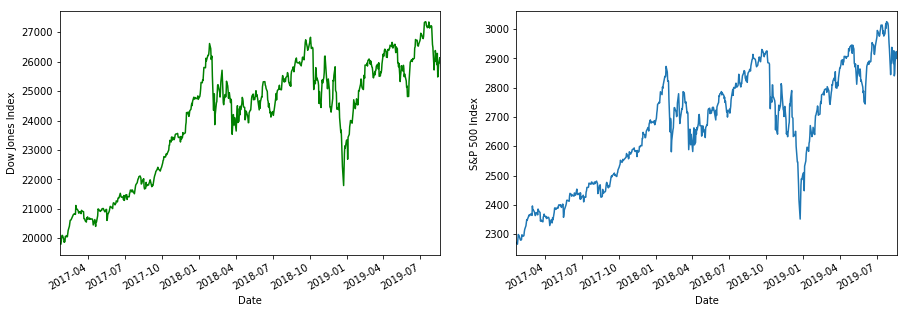

In [259]:
plt.subplot(1, 2, 1)
dji_adj_close.plot(y = df_final['dji_adj_close'], figsize=(15,5),color='green', label='Dow Jones Index');
plt.xlabel('Date');plt.ylabel('Dow Jones Index'); 

plt.subplot(1, 2, 2)
sp_adj_close.plot(y = df_final['sp_adj_close'], figsize=(15,5), label='S&P 500 Index');
plt.xlabel('Date');plt.ylabel('S&P 500 Index'); 

plt.show()